# Construct your own linear congruential random number generator to generate uniformly distributed random numbers between [0,1). You can choose your values for the constants either from Newman or from the wikipedia page on LCG. Make sure you clearly state your choices in your writeup.

In [114]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [115]:
def lcg(modulus, a, c, seed):
    """Linear congruential generator.
    from https://en.wikipedia.org/wiki/Linear_congruential_generator#Sample_Python_code
    
    modulus = the modulus, what to divide by
    a = constant to multiply the seed by
    seed = starting value
    c = constant added to the seed
    """
    while True:
        seed = (a * seed + c) % modulus
        yield seed

# b) Using this LCG, create a function that generate Gaussian random variables. Demonstrate that your code works by comparing a histogram of 10,000 generated values to the unit Gaussian (zero mean, unit standard deviation). Make the y-axis a log scale— this more easily shows that the frequency of rare events is correctly calculated in your code.

In [126]:
N = int(1e4) #10000 points

a = 1664525
c = 1013904223
m = 4294967296
x = 1
y = 42
U1 = []
U2 = []
for i in range(N):
    x = (a*x+c)%m
    U1.append(x)
    y = (a*y+c)%m
    U2.append(y)
 

U1 = np.divide(U1,max(U1))
U2 = np.divide(U2,max(U2))   

Now, apply Box-Muller Transform

In [127]:
from numpy import sqrt,log,cos,pi,sin


In [128]:
# transformation function
def box_muller(u1,u2):
    z1 = sqrt(-2*log(u1))*cos(2*pi*u2)
    z2 = sqrt(-2*log(u1))*sin(2*pi*u2)
    return z1,z2

In [129]:
z1, _ = box_muller(U1,U2)

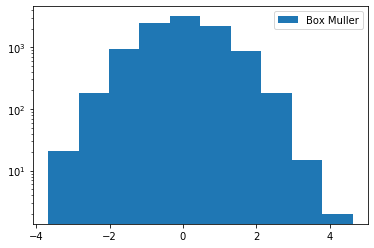

In [130]:
plt.hist(z1,label = 'Box Muller')
plt.yscale('log')
plt.legend()

Now to compare, let's generate 10000 samples using the conventional method. 

In [131]:
from numpy.random import randn


In [92]:
standard_norm = []
i = 0
while i < N:

    standard_norm.append(randn())
    i +=1

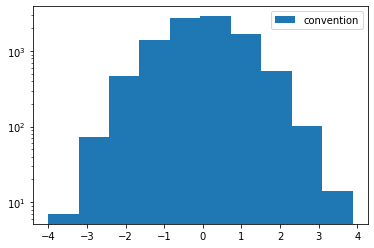

In [93]:
plt.hist(standard_norm,label = 'convention')
plt.yscale('log')
plt.legend()

Now the comparison

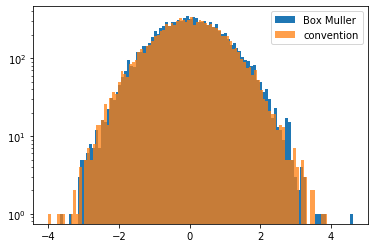

In [137]:
plt.hist(z1,bins=100
,label = 'Box Muller')

plt.hist(standard_norm,bins=100
         ,alpha = .75,label = 'convention')
plt.yscale('log')
plt.legend()

Looks pretty good to me!

# c) Using your code from homework #3, for producing the discrete Fourier transform of a set of data, calculate the power spectrum of your list of 10,000 random Gaussian numbers. Show that this list has the correct scaling with wavenumber k with a plot showing log P vs log k.

In [95]:

def dft(y):
    """
    Code to calculate the discrete fourier transform c_k.
    
    Note that there will both a real and imaginary value for every c, 
    
    so to find the maximum k we need to calculate the power spectrum .
    
    """
    N = len(y) #we create the interval as the length of the dataset.. 
    
    c = np.zeros(N,complex) #list of fourier coef.

    for k in range(N): # Iterate over possible k's
        for n in range(N): #Iterate over all n's
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N) #create a sum to solve for c[k]
    return c

c = dft(z1)

Power Spectrum of Fourier Transform of Z1


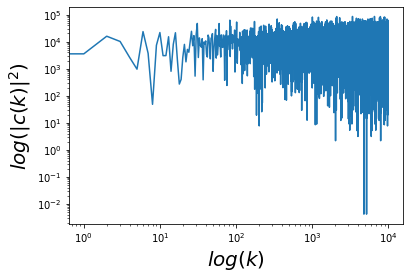

In [99]:
power = np.real(c)**2 + np.imag(c)**2
plt.plot(power) #k is just the index number. 

plt.ylabel("$log(|c(k)|^2)$",fontsize=20)
plt.xlabel('$log(k)$',fontsize=20)
print("Power Spectrum of Fourier Transform of Z1")
plt.xscale('log')
plt.yscale('log')

In [145]:
from numpy.fft import rfft

In [147]:
z1_fft = rfft(z1)


Power Spectrum of Fourier Transform of Z1


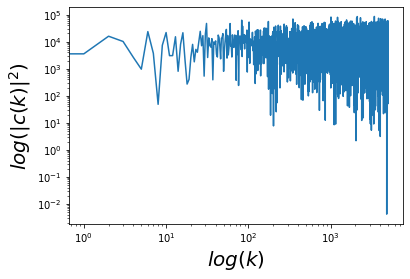

In [149]:
power = np.real(z1_fft)**2 + np.imag(z1_fft)**2
plt.plot(power) #k is just the index number. 

plt.ylabel("$log(|c(k)|^2)$",fontsize=20)
plt.xlabel('$log(k)$',fontsize=20)
print("Power Spectrum of Fourier Transform of Z1")
plt.xscale('log')
plt.yscale('log')

# d) Use this list of random Gaussian numbers to construct a random walk— ie, the i-th value of the sequence is (i-1)-th value in the sequence plus the i-th Gaussian number. Show a plot of your random walk as a function of iteration i.

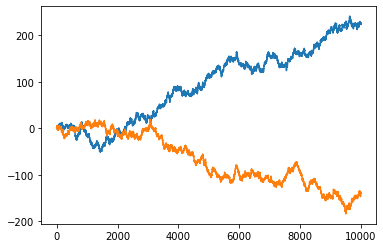

In [150]:
plt.plot(random_walk)
plt.plot(z2.cumsum())

In [112]:
c = dft(random_walk)

Power Spectrum of FT Gaussian Random Walk


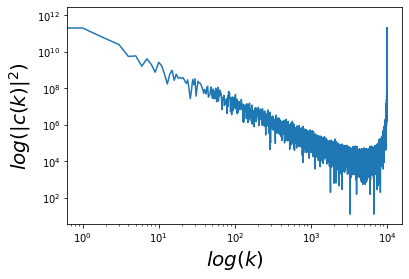

In [113]:
power = np.real(c)**2 + np.imag(c)**2
plt.plot(power) #k is just the index number. 

plt.ylabel("$log(|c(k)|^2)$",fontsize=20)
plt.xlabel('$log(k)$',fontsize=20)
print("Power Spectrum of FT Gaussian Random Walk")
plt.xscale('log')
plt.yscale('log')